# Loss Functions

In this exercise, you will compare the effects of Loss functions on a `LinearRegression` model.

👇 Let's download a CSV file to use for this challenge and parse it into a DataFrame

In [1]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/loss_functions_dataset.csv")
data.sample(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
505,0.74,686.0,245.0,220.5,3.5,0.25,13.125
120,0.74,686.0,245.0,220.5,3.5,0.10,11.905
616,0.64,784.0,343.0,220.5,3.5,0.40,20.460
61,0.82,612.5,318.5,147.0,7.0,0.10,24.470
126,0.71,710.5,269.5,220.5,3.5,0.10,12.175


🎯 Your task is to predict the average temperature inside a greenhouse based on its design. Your temperature predictions will help you select the appropriate greenhouse design for each plant, based on their climate needs. 

🌿 You know that plants can handle small temperature variations, but are exponentially more sensitive as the temperature variations increase. 

## 1. Theory 

❓ Theoretically, which Loss function would you train your model on to limit the risk of killing plants?

<details>
<summary> 🆘 Answer </summary>
    
By theory, you would use a Mean Square Error (MSE) Loss function. It would penalize outlier predictions and prevent your model from committing large errors. This would ensure smaller temperature variations and a lower risk for plants.

</details>

> Mean Square Error

## 2. Application

### 2.1 Preprocessing

❓ Standardise the features

<AxesSubplot:>

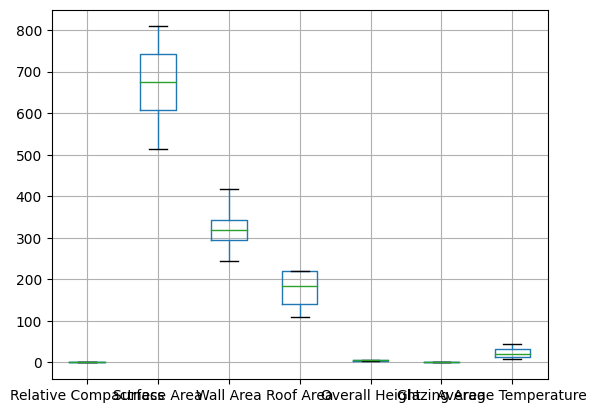

In [2]:
data.boxplot()

In [3]:
X = data.drop('Average Temperature', axis=1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X) 

X_scaled = scaler.transform(X) 

### 2.2 Modeling

In this section, you are going to verify the theory by evaluating models optimized on different Loss functions.

### Least Squares (MSE) Loss

❓ **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **Least Squares Loss** (MSE)



In [24]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

X_scaled
y = data['Average Temperature']

model = SGDRegressor(loss='squared_error')

cv_results = cross_validate(model, X_scaled, y, cv=10, scoring=['max_error','r2'])
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_max_error,test_r2
0,0.016829,0.001013,-9.316819,0.774741
1,0.009286,0.000574,-9.168250,0.898874
2,0.010199,0.000514,-9.368314,0.886125
3,0.009166,0.000320,-9.738368,0.875688
4,0.010144,0.000281,-9.310330,0.926172
5,0.006836,0.000229,-9.132350,0.892257
6,0.007024,0.000201,-9.018212,0.924178
7,0.005328,0.000190,-9.414337,0.912892
8,0.005362,0.000175,-8.853044,0.891600
9,0.004624,0.000160,-8.239183,0.934532


❓ Compute 
- the mean cross-validated R2 score and save it in the variable `r2`
- the single biggest prediction error in °C of all your folds and save it in the variable `max_error`?

(Tips: `max_error` is an accepted scoring metric in sklearn)

In [25]:
r2 = cv_results['test_r2'].mean()
max_error = cv_results['test_max_error'].mean()

print(r2)
print(abs(max_error))

0.8917059266668751
9.15592053017779


### Mean Absolute Error (MAE) Loss

What if we optimize our model on the MAE instead?

❓ **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **MAE** Loss

<details>
<summary>💡 Hints</summary>

- MAE loss cannot be directly specified in `SGDRegressor`. It must be engineered by adjusting the right parameters

</details>

In [26]:
X_scaled
y = data['Average Temperature']

model_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0)

cv_results_mae = cross_validate(model_mae, X_scaled, y, cv=10, scoring=['max_error','r2'])
cv_results_mae = pd.DataFrame(cv_results_mae)
cv_results_mae

,fit_time,score_time,test_max_error,test_r2
0,0.011962,0.000940,-11.486282,0.724937
1,0.008165,0.000771,-9.916236,0.867369
2,0.005733,0.000451,-10.437608,0.867395
3,0.006376,0.000412,-10.790068,0.844722
4,0.005797,0.000339,-11.215856,0.904967
5,0.004470,0.000335,-11.193954,0.856437
6,0.004310,0.000284,-10.857580,0.911283
7,0.004261,0.000280,-12.038652,0.870133
8,0.003694,0.000252,-11.475479,0.866781
9,0.003965,0.000219,-10.853383,0.924129


❓ Compute 
- the mean cross-validated R2 score, store it in `r2_mae`
- the single biggest prediction error of all your folds, store it in `max_error_mae`?

In [27]:
r2_mae = cv_results_mae['test_r2'].mean()
max_error_mae = cv_results_mae['test_max_error'].mean()

print(r2_mae)
print(abs(max_error_mae))

0.8638151491709802
11.026509712046153


## 3. Conclusion

❓Which of the models you evaluated seems the most appropriate for your task?

<details>
<summary> 🆘Answer </summary>
    
Although mean cross-validated r2 scores are approximately similar between the two models, the one optimized on a MAE has more chance to make larger mistakes from time to time, increasing the risk of killing plants!

    
</details>

> MSE

# 🏁 Check your code and push your notebook

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'loss_functions',
    r2 = r2,
    r2_mae = r2_mae,
    max_error = max_error,
    max_error_mae = max_error_mae
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-loss-functions/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 3 items

test_loss_functions.py::TestLossFunctions::test_max_error_order PASSED   [ 33%]
test_loss_functions.py::TestLossFunctions::test_r2 PASSED                [ 66%]
test_loss_functions.py::TestLossFunctions::test_r2_mae PASSED            [100%]

============================== 3 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/loss_functions.pickle

git commit -m 'Completed loss_functions step'

git push origin master

